# Testing code

In [4]:
# Main Imports
import sys
import deerlab as dl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import XeprAPI
import time


# Local Imports
sys.path.append("../autoDeer")
import xepr_api_adv as api
import DEER_4p as deer
import Param_Optimization as po
from TwoD_Experiment import TwoD_Experiment

### Connecting to Xepr

In [5]:
api.find_Xepr()
api.find_cur_exp()

<Experiment('Experiment')>

## Optimization Experiment

 Carr Purcell Xmax set to 7950.0 ns


/home/xuser/miniconda3/envs/huka_2D_Dec/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/xuser/Desktop/huka/autoDeer/Jupyter Notebooks/../autoDeer/Param_Optimization.py:233: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cp_fig.show()


 Carr Purcell Xmax set to 7950.0 ns
 Maximum tau2 set to 7950 ns


/home/xuser/miniconda3/envs/huka_2D_Dec/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/xuser/Desktop/huka/autoDeer/Jupyter Notebooks/../autoDeer/Param_Optimization.py:251: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  tau2_fig.show()


The optimal pulse delays are: (440.0, 7760.0)


/home/xuser/Desktop/huka/autoDeer/Jupyter Notebooks/../autoDeer/TwoD_Experiment.py:230: RuntimeWarning: divide by zero encountered in true_divide
  self.data_snrpshot = np.real(self.data) / (np.sqrt(total_shots) * self.noise)
/home/xuser/Desktop/huka/autoDeer/Jupyter Notebooks/../autoDeer/TwoD_Experiment.py:230: RuntimeWarning: invalid value encountered in true_divide
  self.data_snrpshot = np.real(self.data) / (np.sqrt(total_shots) * self.noise)


1

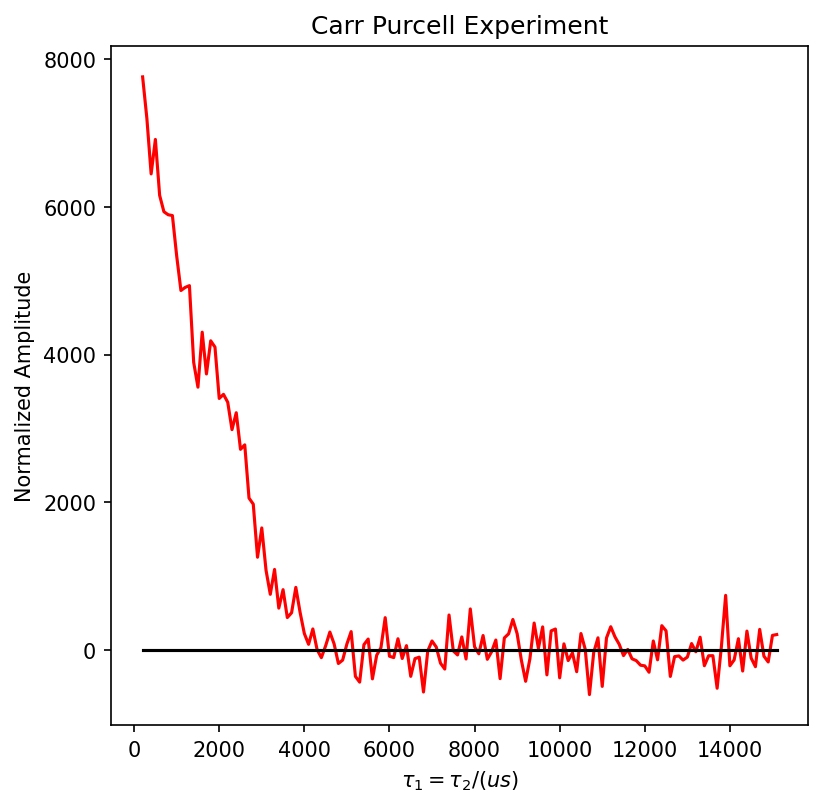

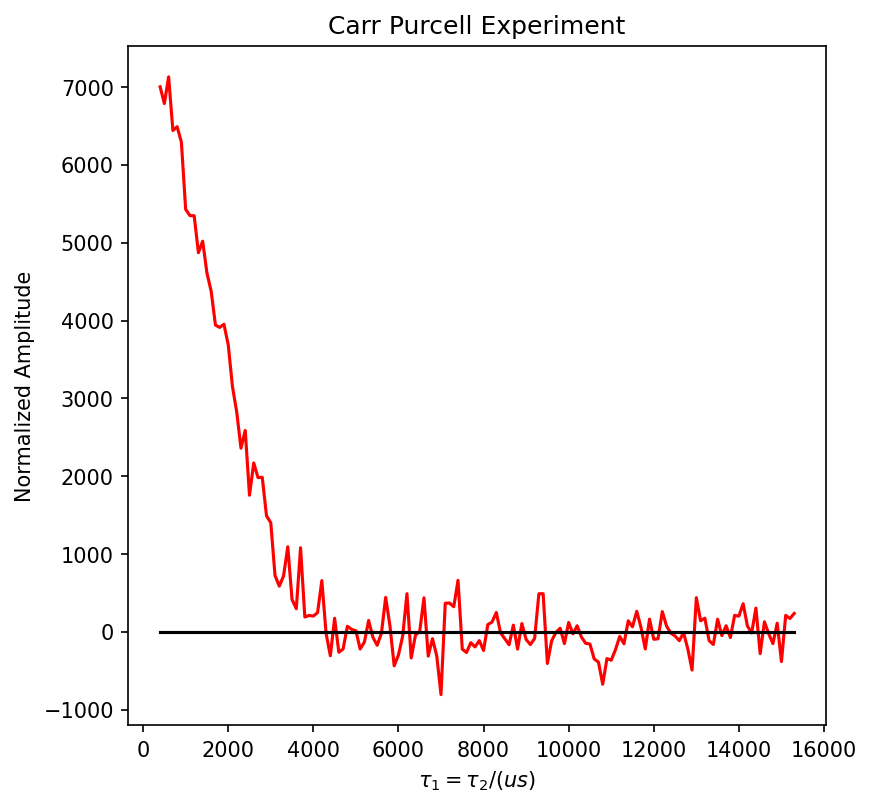

In [5]:
po.main_run([16,32],652)

 Carr Purcell Xmax set to 7200.0 ns


<ipython-input-3-2c439f353c55>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  cp_fig.show()


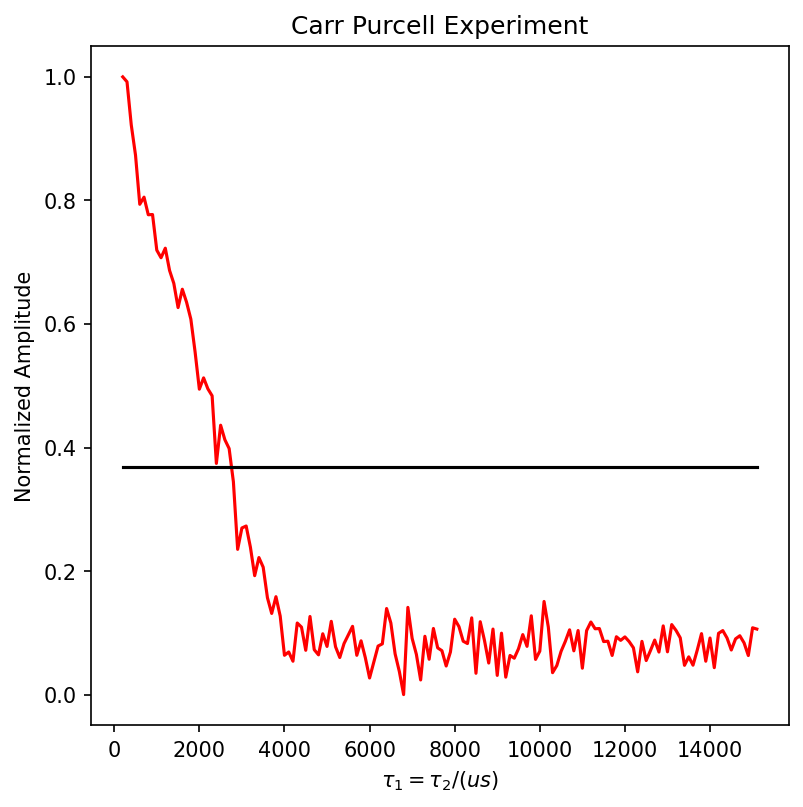

In [3]:
ps_length = [16,32]
d0 = 652
cur_exp = api.get_cur_exp_global()

# Start the carr_purcell_run
po.carr_purcell_run(cur_exp,ps_length,d0)

# Detect when experiments is finished and save data
while api.is_exp_running() == True:
    time.sleep(1)

# Acquire complete data set
cp_t,cp_data = api.acquire_dataset()
# Save complete data set using bruker formats

# Identify the max time
cp_max = po.carr_purcell_analysis(cp_t,cp_data)
cp_fig = po.carr_purcell_plot(cp_t,cp_data)
cp_fig.show()

## DEER

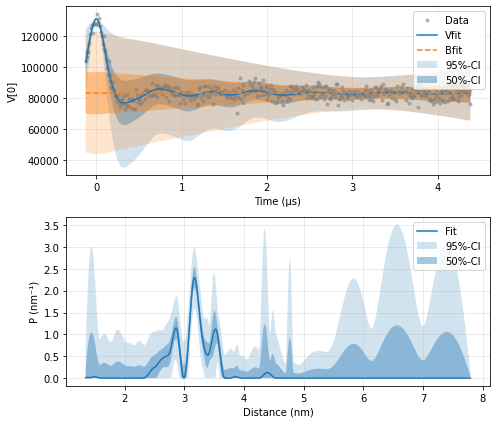

SNR=38.04722836117899
Mod=0.36561829587632194


In [12]:
[fit,sigma] = deer.deerlab_next_scan()
fit.plot()
print(f'SNR={fit.V.max()/sigma}')
print(f'Mod={fit.exparam[0]}')

In [13]:
deer.run_4pDeer(cur_exp,16,[580,4400,2000],[10,2,2],[10,2000,1])

DEER Dimension changed to 198


1

In [5]:
po.twoD_scan(cur_exp,[16,32],[652,200,200],[100,100],[4,4])

1

The optimal pulse delays are: (2900.0, 3300.0)


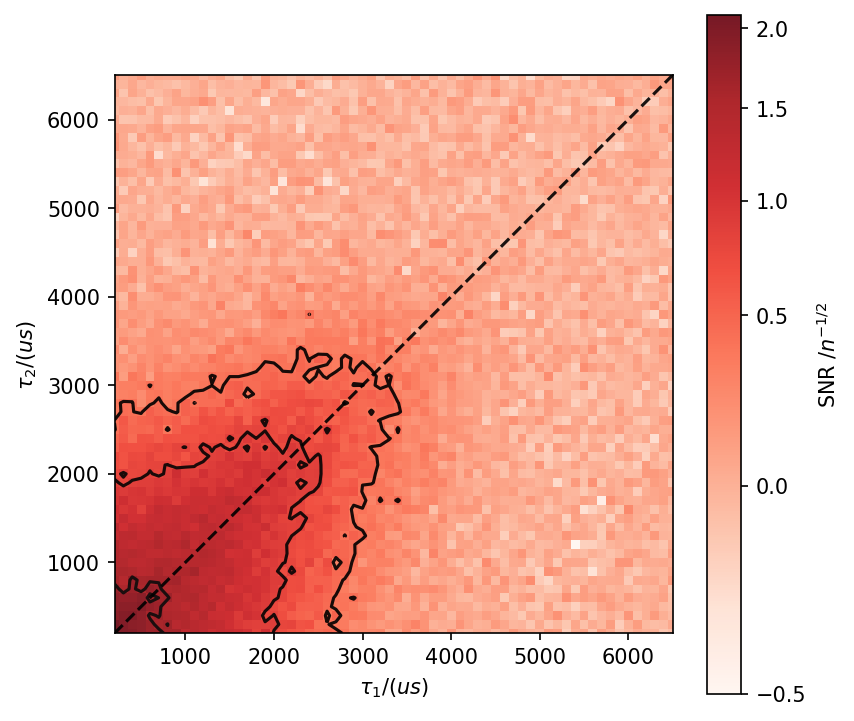

In [12]:
t1,t2,data = api.acquire_dataset()

last_scan = TwoD_Experiment()
last_scan.import_data((t1,t2),data,1,4,6000)
last_scan.snr_normalize(4*4*16)
last_scan.calculate_optimal()
print(f'The optimal pulse delays are: {last_scan.time_4p}')
plt = last_scan.create_twoD_plot(norm = 'SNRpShot',contour='SNRpShot')

In [14]:
Xepr = api.get_Xepr_global()
hidden = Xepr.XeprExperiment("AcqHidden")

In [25]:
dir(hidden["cwBridge.SignalPhase"])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_aqStepParValue_',
 '_dim',
 '_getpar',
 '_implicitpar',
 '_name',
 '_parent',
 '_setpar',
 '_type',
 'aqGetBoolParValue',
 'aqGetEnumParValue',
 'aqGetIntParValue',
 'aqGetParCoarseSteps',
 'aqGetParDimSize',
 'aqGetParFineSteps',
 'aqGetParLabel',
 'aqGetParMaxValue',
 'aqGetParMinValue',
 'aqGetParNbDim',
 'aqGetParType',
 'aqGetParUnits',
 'aqGetRealParValue',
 'aqGetStrParValue',
 'aqSetBoolParValue',
 'aqSetEnumParValue',
 'aqSetIntParValue',
 'aqSetRealParValue',
 'aqSetStrParValue',
 'aqStepParValue',
 'value']

In [34]:
hidden["cwBridge.SignalPhase"].value = 2701

In [ ]:
2701